# Que 1
**How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

The desired matrix will be containing k products and sum of k - 1 elements. So the total number of multiplications is n * m * k, and the total number of additions is n * m * (k - 1).

# Que 2
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import numpy as np
import timeit

def matrix_multiply_list_of_lists(A, B):
    result = [[0 for x in range(len(A))] for y in range(len(B))] 

    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(A[0])):
                result[i][j] += A[i][k] * B[k][j]
    return result

A = [[1,2,3],
     [4,5,6],
     [7,8,9]]

B = [[9,0,7],
     [6,5,4],
     [3,2,1]]

list_of_lists_time = timeit.timeit(
    stmt=lambda: matrix_multiply_list_of_lists(A, B),
    number=10000 
)

print(f"Time taken by list of lists: {list_of_lists_time * 1000} ms")

numpy_time = timeit.timeit(
    stmt=lambda: np.dot(A, B),
    number=10000)


print(f"Time taken by numpy: {numpy_time * 1000} ms")

Time taken by list of lists: 73.005199956242 ms
Time taken by numpy: 42.170099972281605 ms


In general, the numpy solution is expected to be faster. Numpy is implemented in C and optimized for numerical operations, while the list of lists solution is implemented in pure Python. The difference in performance becomes more significant as the size of the matrices increases. Numpy uses highly optimized algorithms and takes advantage of parallel processing, making it more efficient for numerical computations compared to pure Python implementations.

# Que 3 

In [2]:
import timeit

def find_maximum(lst):
    max_val = 0
    for item in lst:
        if item > max_val:
            max_val = item  
    return max_val

def find_median_method1(lst):
    sorted_lst = []

    for i in range(len(lst)):
        sorted_lst.append(find_maximum(lst))
        lst.remove(find_maximum(lst))

    mid = len(sorted_lst) // 2

    if len(sorted_lst) % 2 == 0:
        return (sorted_lst[mid - 1] + sorted_lst[mid]) / 2
    else:
        return sorted_lst[mid]

original_list = [3, 6, 1, 7, 9, 4]

execution_time = timeit.timeit(lambda: print(find_median_method1(original_list)), number=1)

print(f"Time taken by method 1: {execution_time} seconds")

# here the time complexity is O(n**2)



# Method 3
def calculate_median_method2(input_list):
    sorted_list = sorted(input_list, reverse=True)
    mid = len(sorted_list) // 2

    if len(sorted_list) % 2 == 0:
        return (sorted_list[mid - 1] + sorted_list[mid]) / 2
    else:
        return sorted_list[mid]

original_list = [3, 6, 1, 7, 9, 4]

execution_time = timeit.timeit(lambda: print(calculate_median_method2(original_list)), number=1)

print(f"Time taken by method 2: {execution_time} seconds")


# Method 3

def calculate_numpy_median(input_list):
    return np.median(input_list)

original_list = [3, 6, 1, 7, 9, 4]

execution_time = timeit.timeit(lambda: print(calculate_numpy_median(original_list)), number=1)

print(f"Execution time: {execution_time} seconds")

# Method 1: O(n^2 ) 
# Method 2: O(nlogn) 
# Numpy's median routine:  O(nlogn)

5.0
Time taken by method 1: 0.00015510001685470343 seconds
5.0
Time taken by method 2: 1.8599967006593943e-05 seconds
5.0
Execution time: 0.004547799995634705 seconds


# Que 4, 5, 6
What is the gradient of the following function with respect to x and y?

$x^2y+y^3\sin(x)$

Now,

$f(x,y) =  x^2y+y^3\sin(x)$

Partial derivitive wrt x: $\frac{\partial f(x,y)}{\partial x} = {2xy + y^3\cos(x)}$

Partial derivitive wrt y: $\frac{\partial f(x,y)}{\partial y} = {x^2 + 3y^2\sin(x)}$

$grad{(f(x,y))} = ({2xy + y^3\cos(x)}, {x^2 + 3y^2\sin(x)})$


In [3]:
import jax
import jax.numpy as jnp
import sympy as sp

def f_jax(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_f_jax = jax.grad(f_jax, argnums=(0, 1))

x_val, y_val = 1.5, 2.0

jax_gradient = grad_f_jax(x_val, y_val)
print(f"JAX Gradient at (x, y) = ({x_val}, {y_val}): {jax_gradient}")

x, y = sp.symbols('x y')
f_sympy = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f_sympy, x)
df_dy = sp.diff(f_sympy, y)

sympy_gradient = (df_dx.evalf(subs={x: x_val, y: y_val}), df_dy.evalf(subs={x: x_val, y: y_val}))
print(f"SymPy Gradient at (x, y) = ({x_val}, {y_val}): {sympy_gradient}")

JAX Gradient at (x, y) = (1.5, 2.0): (Array(6.5658975, dtype=float32, weak_type=True), Array(14.21994, dtype=float32, weak_type=True))
SymPy Gradient at (x, y) = (1.5, 2.0): (6.56589761334162, 14.2199398392487)


# Que 7

In [4]:
import numpy as np

student_data = {
    2022: {
        'Branch 1': {
            1: {'Roll number': '1', 'Name': 'John', 'Marks': {'Maths': 80, 'English': 75}},
            2: {'Roll number': '2', 'Name': 'Alice', 'Marks': {'Maths': 90, 'English': 85}},
        },
        'Branch 2': {
            1: {'Roll number': '1', 'Name': 'Bob', 'Marks': {'Maths': 85, 'English': 70}},
            2: {'Roll number': '2', 'Name': 'Eva', 'Marks': {'Maths': 88, 'English': 92}},
        }
    },
    2023: {
        'Branch 1': {
            1: {'Roll number': '1', 'Name': 'Michael', 'Marks': {'Maths': 78, 'English': 88}},
            2: {'Roll number': '2', 'Name': 'Sophia', 'Marks': {'Maths': 85, 'English': 80}},
        },
        'Branch 2': {
            1: {'Roll number': '1', 'Name': 'David', 'Marks': {'Maths': 92, 'English': 75}},
            2: {'Roll number': '2', 'Name': 'Emma', 'Marks': {'Maths': 82, 'English': 89}},
        },
    },
    2024: {
        'Branch 1': {
            1: {'Roll number': '1', 'Name': 'Olivia', 'Marks': {'Maths': 70, 'English': 65}},
            2: {'Roll number': '2', 'Name': 'Daniel', 'Marks': {'Maths': 78, 'English': 70}},
        },
        'Branch 2': {
            1: {'Roll number': '1', 'Name': 'Aiden', 'Marks': {'Maths': 65, 'English': 60}},
            2: {'Roll number': '2', 'Name': 'Mia', 'Marks': {'Maths': 75, 'English': 80}},
        },
    },
    2025: {
        'Branch 1': {
            1: {'Roll number': '1', 'Name': 'Liam', 'Marks': {'Maths': 72, 'English': 78}},
            2: {'Roll number': '2', 'Name': 'Ava', 'Marks': {'Maths': 80, 'English': 72}},
        },
        'Branch 2': {
            1: {'Roll number': '1', 'Name': 'Ethan', 'Marks': {'Maths': 68, 'English': 85}},
            2: {'Roll number': '2', 'Name': 'Isabella', 'Marks': {'Maths': 77, 'English': 90}},
        },
    },
}

print(student_data)

{2022: {'Branch 1': {1: {'Roll number': '1', 'Name': 'John', 'Marks': {'Maths': 80, 'English': 75}}, 2: {'Roll number': '2', 'Name': 'Alice', 'Marks': {'Maths': 90, 'English': 85}}}, 'Branch 2': {1: {'Roll number': '1', 'Name': 'Bob', 'Marks': {'Maths': 85, 'English': 70}}, 2: {'Roll number': '2', 'Name': 'Eva', 'Marks': {'Maths': 88, 'English': 92}}}}, 2023: {'Branch 1': {1: {'Roll number': '1', 'Name': 'Michael', 'Marks': {'Maths': 78, 'English': 88}}, 2: {'Roll number': '2', 'Name': 'Sophia', 'Marks': {'Maths': 85, 'English': 80}}}, 'Branch 2': {1: {'Roll number': '1', 'Name': 'David', 'Marks': {'Maths': 92, 'English': 75}}, 2: {'Roll number': '2', 'Name': 'Emma', 'Marks': {'Maths': 82, 'English': 89}}}}, 2024: {'Branch 1': {1: {'Roll number': '1', 'Name': 'Olivia', 'Marks': {'Maths': 70, 'English': 65}}, 2: {'Roll number': '2', 'Name': 'Daniel', 'Marks': {'Maths': 78, 'English': 70}}}, 'Branch 2': {1: {'Roll number': '1', 'Name': 'Aiden', 'Marks': {'Maths': 65, 'English': 60}}, 2: 

# Que 8

In [5]:
import numpy as np

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

# Generating data
years = 4
branches = 2
num_students_per_branch = 2

database = Database()

for index_y in range(years):
    year_number = 2022 + index_y
    current_year = Year(year_number)

    for index_b in range(branches):
        branch_name = f'Branch {index_b + 1}'
        current_branch = Branch(branch_name)

        for index_s in range(num_students_per_branch):
            roll_number = f'Roll Number {index_s + 1}'
            name = chr(np.random.randint(65, 90))
            marks = {'Maths': np.random.randint(30, 100), 'English': np.random.randint(30, 100)}

            current_student = Student(roll_number, name, marks)
            current_branch.add_student(current_student)

        current_year.add_branch(current_branch)

    database.add_year(current_year)

for year in database.years:
    print(f"Year: {year.year}")
    for branch in year.branches:
        print(f"  Branch: {branch.name}")
        for student in branch.students:
            print(f"     {student.roll_number}-  Student: {student.name}  - Marks: {student.marks}")


Year: 2022
  Branch: Branch 1
     Roll Number 1-  Student: V  - Marks: {'Maths': 74, 'English': 92}
     Roll Number 2-  Student: F  - Marks: {'Maths': 92, 'English': 40}
  Branch: Branch 2
     Roll Number 1-  Student: P  - Marks: {'Maths': 73, 'English': 37}
     Roll Number 2-  Student: X  - Marks: {'Maths': 57, 'English': 51}
Year: 2023
  Branch: Branch 1
     Roll Number 1-  Student: W  - Marks: {'Maths': 64, 'English': 48}
     Roll Number 2-  Student: U  - Marks: {'Maths': 89, 'English': 78}
  Branch: Branch 2
     Roll Number 1-  Student: J  - Marks: {'Maths': 46, 'English': 99}
     Roll Number 2-  Student: N  - Marks: {'Maths': 86, 'English': 50}
Year: 2024
  Branch: Branch 1
     Roll Number 1-  Student: J  - Marks: {'Maths': 35, 'English': 82}
     Roll Number 2-  Student: Y  - Marks: {'Maths': 94, 'English': 80}
  Branch: Branch 2
     Roll Number 1-  Student: B  - Marks: {'Maths': 88, 'English': 80}
     Roll Number 2-  Student: X  - Marks: {'Maths': 74, 'English': 93}
Y

# Que 9

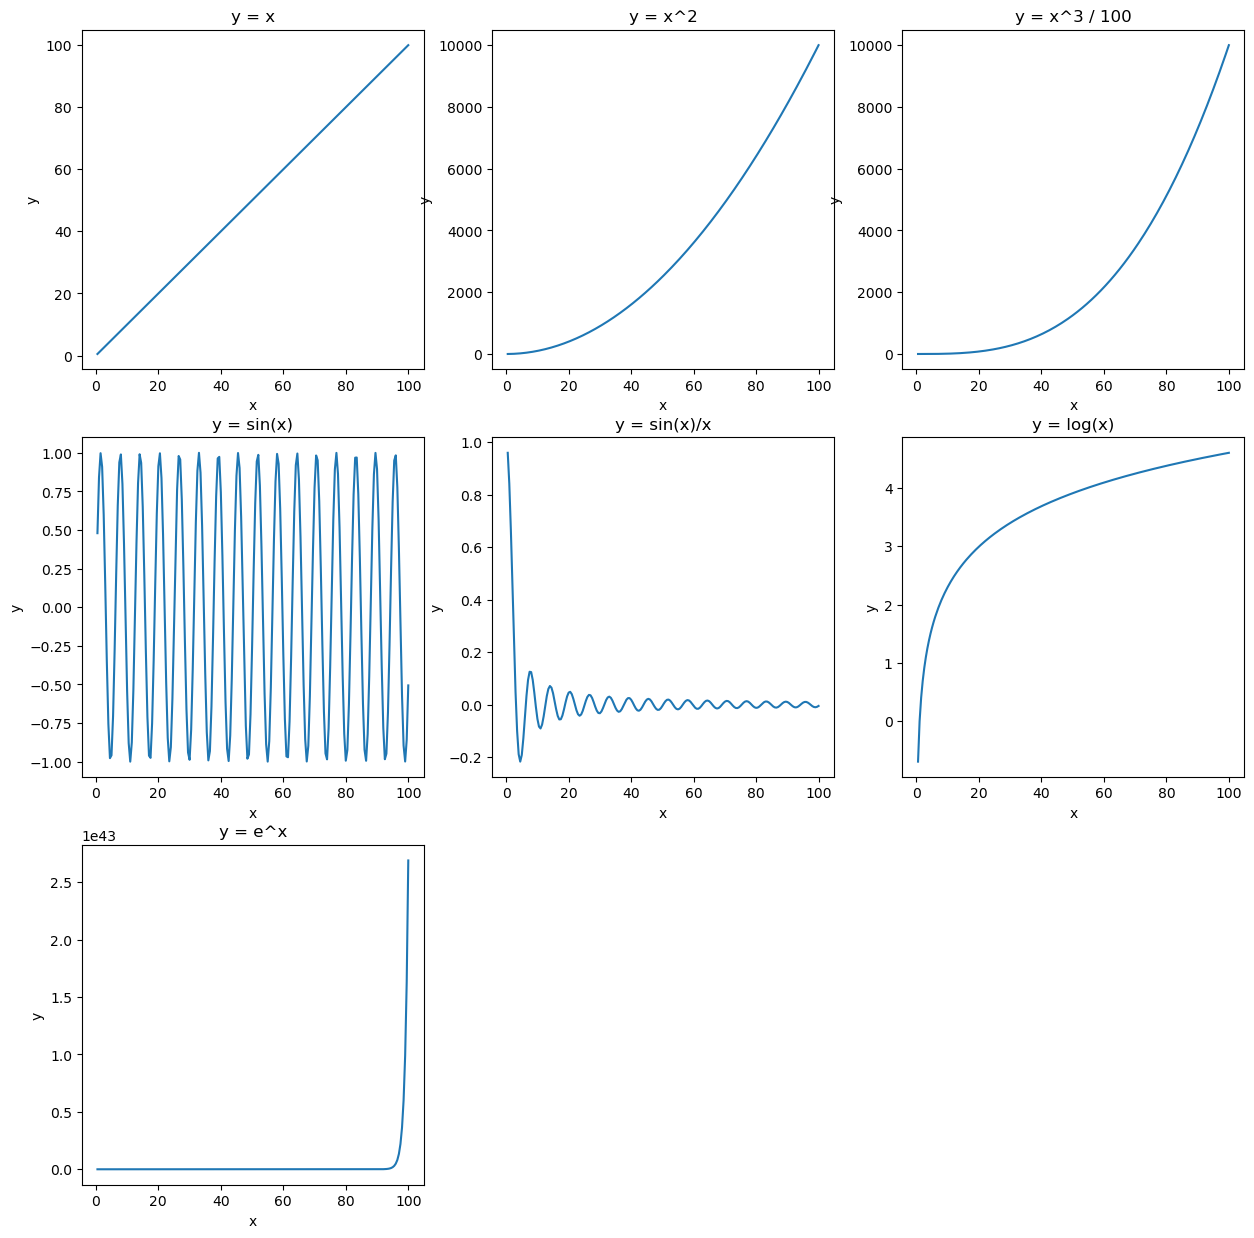

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x_value = np.arange(0.5,100.1,0.5)

y_value_x = x_value
y_value_x_2 = (x_value)**2
y_value_x_3 = ((x_value)**3)/100
y_value_sin = np.sin(x_value)
y_value_sin_x = (np.sin(x_value))/x_value
y_value_log = np.log(x_value)
y_value_exp = np.exp(x_value)



plt.figure(figsize=(15, 15))
plt.subplot(3,3 , 1)
plt.plot(x_value,y_value_x)
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(3,3 , 2)
plt.plot(x_value,y_value_x_2)
plt.title('y = x^2')
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(3,3 , 3)
plt.plot(x_value,y_value_x_3)
plt.title('y = x^3 / 100')
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(3,3 , 4)
plt.plot(x_value,y_value_sin)
plt.title('y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(3,3 , 5)
plt.plot(x_value,y_value_sin_x)
plt.title('y = sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(3,3 , 6)
plt.plot(x_value,y_value_log)
plt.title('y = log(x)')
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(3,3, 7)
plt.plot(x_value,y_value_exp)
plt.title('y = e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Que 10

In [7]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1,2, size = (20,5))

matrix

df = pd.DataFrame(matrix, columns = ['a','b','c','d','e'])


print(df)


           a         b         c         d         e
0   1.838016  1.467056  1.335995  1.790164  1.557216
1   1.408699  1.720482  1.913134  1.260349  1.571396
2   1.835210  1.374107  1.533556  1.297337  1.813963
3   1.079510  1.336994  1.154487  1.702082  1.142476
4   1.090957  1.932797  1.947660  1.267672  1.191859
5   1.992988  1.389728  1.136279  1.847230  1.029485
6   1.638026  1.210364  1.955442  1.658324  1.943147
7   1.803357  1.323565  1.397605  1.110622  1.545069
8   1.121727  1.329860  1.069159  1.706904  1.444117
9   1.666645  1.577309  1.530660  1.449228  1.679340
10  1.282369  1.563065  1.863652  1.130019  1.678176
11  1.428348  1.441016  1.178256  1.468062  1.160656
12  1.723166  1.894996  1.202704  1.176852  1.225374
13  1.626027  1.592999  1.206691  1.055631  1.500970
14  1.687547  1.481994  1.069894  1.608374  1.355217
15  1.843533  1.131707  1.734935  1.918481  1.394912
16  1.018913  1.088282  1.553793  1.986088  1.485501
17  1.925506  1.130659  1.979305  1.569288  1.

In [8]:
highest_std_column = df.std().idxmax()

lowest_mean_row = df.mean(axis=1).idxmin()

print("Column with the highest standard deviation:", highest_std_column)
print("Row with the lowest mean:", lowest_mean_row)


Column with the highest standard deviation: c
Row with the lowest mean: 18


# Que 11

In [9]:
df['f'] = df[['a','b','c','d','e']].sum(axis=1)

In [10]:
df['g'] = np.where(df['f'] < 8, 'LT8', 'HT8' )

In [11]:
num_rows_LT8 = (df['g'] == 'LT8').sum()

In [12]:
std_dev_LT8 = df.loc[df['g'] == 'LT8', 'f'].std()

In [13]:
std_dev_HT8 = df.loc[df['g'] == 'HT8', 'f'].std()

# Que 12

In [14]:
b_arr1 = np.array([[1,2,3],[4,5,6]])
b_arr2 = np.array([[1,2,3]])
b_result = b_arr1 + b_arr2

print(b_arr1)
print(b_arr2)
print(b_result)

[[1 2 3]
 [4 5 6]]
[[1 2 3]]
[[2 4 6]
 [5 7 9]]


# Que 13
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [15]:
import numpy as np

def my_argmin(arr):
    min_index = 0

    for i in range(1, len(arr)):
        if arr[i] < arr[min_index]:
            min_index = i

    return min_index

numpy_array = np.array([5, 3, 8, 1, 6, 2])

custom_argmin_result = my_argmin(numpy_array)
print("Custom argmin result:", custom_argmin_result)

numpy_argmin_result = np.argmin(numpy_array)
print("NumPy argmin result:", numpy_argmin_result)

Custom argmin result: 3
NumPy argmin result: 3
